In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [ ]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 29

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 29)                319       
                                                                 
Total params: 1,389
Trainable params: 1,389
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
156/166 [===========================>..] - ETA: 0s - loss: 3.2651 - accuracy: 0.0841
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
166/166 [==============================] - 2s 5ms/step - loss: 3.2542 - accuracy: 0.0874 - val_loss: 3.0223 - val_accuracy: 0.1866
Epoch 2/1000
150/166 [==========================>...] - ETA: 0s - loss: 2.9387 - accuracy: 0.1673
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
166/166 [==============================] - 1s 4ms/step - loss: 2.9226 - accuracy: 0.1701 - val_loss: 2.5682 - val_accuracy: 0.2704
Epoch 3/1000
164/166 [============================>.] - ETA: 0s - loss: 2.6256 - accuracy: 0.2151
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
166/166 [==============================] - 1s 4ms/step - loss: 2.6233 - accuracy: 0.2156 - val_loss: 2.2152 - val_accuracy: 0.3799
Epoch 4/1000
157/166 [===========================>..] - ETA: 0s - loss: 2.4237 - accu

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

56/56 [==============================] - 0s 2ms/step - loss: 1.1041 - accuracy: 0.6522


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 89ms/step
[6.8358523e-03 3.6999155e-04 1.1886880e-04 7.9910370e-04 3.3057647e-04
 4.2464872e-04 1.9865292e-03 2.7388030e-01 1.4509785e-05 6.0833609e-01
 1.8002171e-06 7.3262108e-03 3.2003459e-02 5.4601376e-04 8.0046767e-08
 9.3016849e-04 8.6922944e-03 6.5398021e-03 5.1977844e-03 4.0424871e-03
 2.1089297e-03 2.8585144e-03 3.4470155e-03 6.1757628e-06 1.4298360e-04
 1.2782700e-06 1.0591034e-03 8.6120172e-06 3.1990822e-02]
9


# Confusion matrix

222/222 [==============================] - 0s 2ms/step


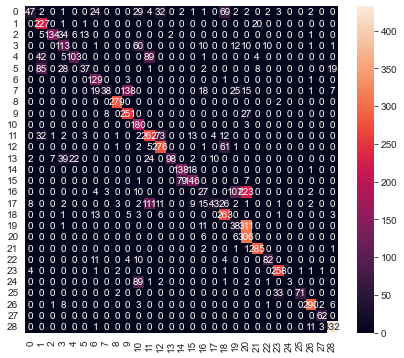

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.21      0.33       223
           1       0.58      0.91      0.71       249
           2       0.94      0.69      0.79       195
           3       0.48      0.52      0.50       218
           4       0.79      0.42      0.55       244
           5       0.69      0.21      0.32       180
           6       0.64      0.96      0.77       134
           7       0.78      0.15      0.25       261
           8       0.97      0.99      0.98       281
           9       0.63      0.88      0.73       286
          10       0.46      0.98      0.63       183
          11       0.53      0.65      0.58       405
          12       0.69      0.80      0.74       347
          13       0.98      0.48      0.64       204
          14       0.63      0.88      0.73       157
          15       0.77      0.63      0.69       233
          16       0.29      0.07      0.11       376
     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpcv8gwn3c\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpcv8gwn3c\assets


7708

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.04 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.8358509e-03 3.6999129e-04 1.1886876e-04 7.9910364e-04 3.3057635e-04
 4.2464843e-04 1.9865306e-03 2.7388042e-01 1.4509782e-05 6.0833597e-01
 1.8002133e-06 7.3262136e-03 3.2003470e-02 5.4601388e-04 8.0046824e-08
 9.3016820e-04 8.6922888e-03 6.5398007e-03 5.1977830e-03 4.0424820e-03
 2.1089262e-03 2.8585121e-03 3.4470186e-03 6.1757619e-06 1.4298355e-04
 1.2782697e-06 1.0591031e-03 8.6120235e-06 3.1990815e-02]
9
